<a href="https://colab.research.google.com/github/mdepasquale1023/MasteryProject1/blob/main/MasteryProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('query_results.csv')

In [25]:
data['converted'] = np.where(data['spent']>0,1,0)

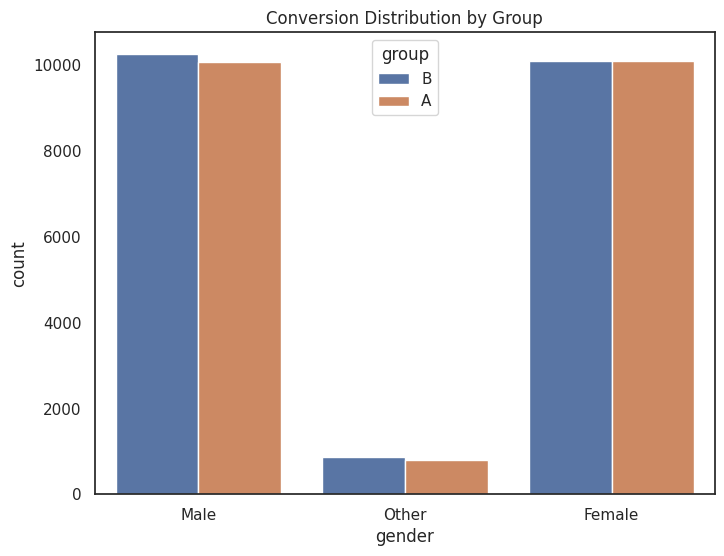

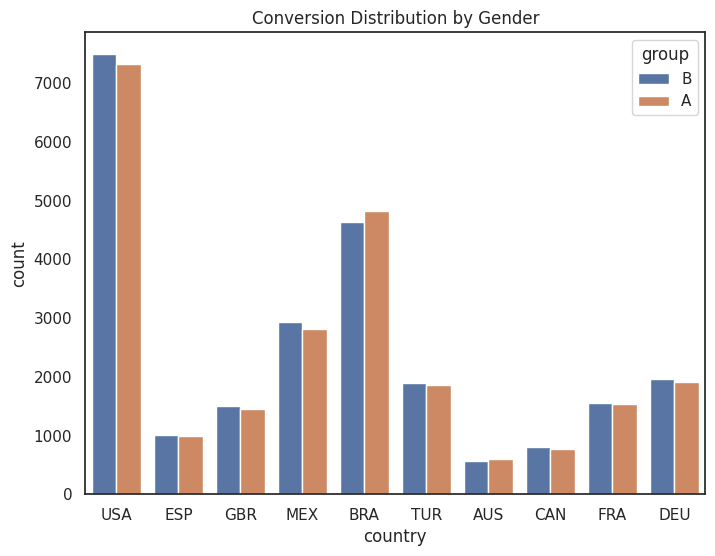

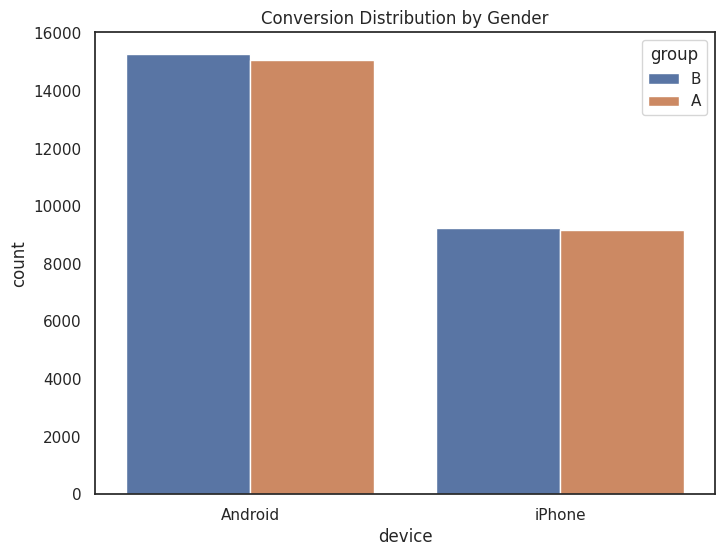

In [26]:
# Set the plot style
sns.set(style="white")

# Replace values in the 'gender' column
data['gender'] = data['gender'].replace({'M': 'Male', 'F': 'Female', 'O': 'Other'})

# Conversion distribution by group
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='group', data=data)
plt.title('Conversion Distribution by Group')
plt.show()

# Conversion distribution by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='country', hue='group', data=data)
plt.title('Conversion Distribution by Gender')
plt.show()

# Replace values in the 'device' column
data['device'] = data['device'].replace({'A': 'Android', 'I': 'iPhone'})

# Conversion distribution by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='device', hue='group', data=data)
plt.title('Conversion Distribution by Gender')
plt.show()

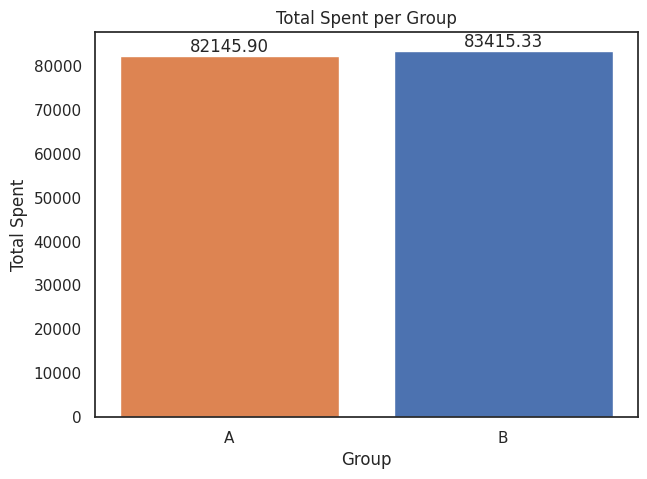

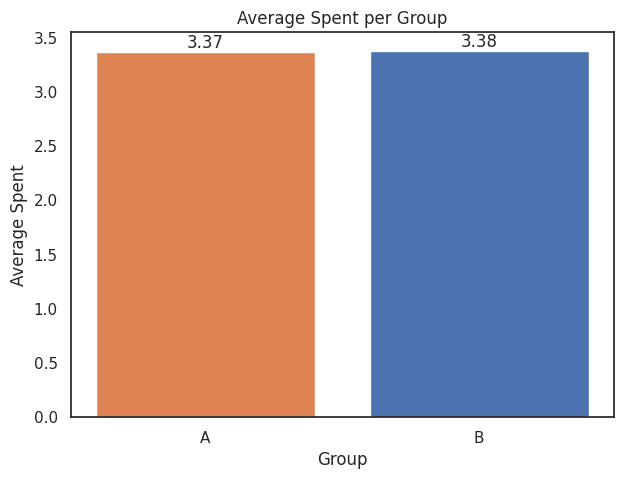

In [27]:
# Set the plot style
sns.set(style="white")

# Set the color palette
palette = sns.color_palette()

# Grouping data by group and calculating total spent and average spent
group_spent = data.groupby('group')['spent'].agg(['sum', 'mean'])

# Plotting the total spent per group
plt.figure(figsize=(7, 5))
plt.bar(group_spent.index, group_spent['sum'], color=palette[1::-1])
plt.xlabel('Group')
plt.ylabel('Total Spent')
plt.title('Total Spent per Group')

# Placing total values on top of the bars
for i, value in enumerate(group_spent['sum']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

# Plotting the average spent per group
plt.figure(figsize=(7, 5))
plt.bar(group_spent.index, group_spent['mean'], color=palette[1::-1])
plt.xlabel('Group')
plt.ylabel('Average Spent')
plt.title('Average Spent per Group')

# Placing average values on top of the bars
for i, value in enumerate(group_spent['mean']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

## T-Test comparing means

In [37]:
from scipy import stats

In [29]:
control_group = data[data['group'] == 'A']['spent']
test_group = data[data['group'] == 'B']['spent']

tTest, pValue = stats.ttest_ind(control_group, test_group, equal_var = False)

In [30]:
print('T-test =', tTest)
print('P-value =', pValue)

T-test = -0.05968867409877314
P-value = 0.9524038357137619


## Z-Test comparing proportions

In [31]:
from statsmodels.stats import weightstats as stests

df = pd.read_csv('query_results.csv')

df['spent'] = pd.to_numeric(df['spent'], errors='coerce')

In [32]:
df['spent'] = df['spent'].fillna(0)

In [33]:
df['conversion'] = (df['spent']>0).astype(int)

In [34]:
control_group = df[df['group'] == 'A']['conversion']
test_group = df[df['group'] == 'B']['conversion']

In [35]:
zTest, pValue = stests.ztest(control_group, test_group, alternative='two-sided')

In [36]:
print('Z-test =', zTest)
print('P-value =', pValue)

Z-test = -4.1671481204767735
P-value = 3.0843409651921254e-05
